In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer


In [2]:
#load the data
bike_data=pd.read_csv("../data/bikes.csv")
bike_data

,date,real_temperature,feel_temperature,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,count
0,04/01/2015,2.75,0.00,93.00,7.500000,broken_clouds,False,True,winter,9234
1,05/01/2015,9.00,7.25,81.50,8.854167,broken_clouds,False,False,winter,20372
2,06/01/2015,8.00,5.75,79.75,16.000000,clear,False,False,winter,20613
3,07/01/2015,9.00,5.50,81.00,19.760870,scattered_clouds,False,False,winter,21064
4,08/01/2015,9.00,6.75,79.50,20.479167,rain,False,False,winter,15601
...,...,...,...,...,...,...,...,...,...,...
725,30/12/2016,4.00,1.00,100.00,9.000000,cloudy,False,False,winter,11566
726,31/12/2016,7.50,5.00,90.00,13.312500,cloudy,False,True,winter,11424
727,01/01/2017,7.00,4.75,90.00,14.125000,rain,False,True,winter,6421
728,02/01/2017,3.25,0.50,82.50,11.166667,clear,True,False,winter,11823


In [3]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              730 non-null    object 
 1   real_temperature  730 non-null    float64
 2   feel_temperature  657 non-null    float64
 3   humidity          730 non-null    float64
 4   wind_speed        730 non-null    float64
 5   weather_code      679 non-null    object 
 6   is_holiday        730 non-null    bool   
 7   is_weekend        730 non-null    bool   
 8   season            694 non-null    object 
 9   count             730 non-null    int64  
dtypes: bool(2), float64(4), int64(1), object(3)
memory usage: 47.2+ KB


In [4]:
# Fill missing values with median of the column
#bike_data["feel_temperature"] = bike_data["feel_temperature"].fillna(bike_data["feel_temperature"].median())

median_feel_temp = bike_data["feel_temperature"].median()
bike_data["feel_temperature"] = bike_data["feel_temperature"].fillna(median_feel_temp)

# Check for remaining missing values
bike_data.isnull().sum()

date                 0
real_temperature     0
feel_temperature     0
humidity             0
wind_speed           0
weather_code        51
is_holiday           0
is_weekend           0
season              36
count                0
dtype: int64

In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              730 non-null    object 
 1   real_temperature  730 non-null    float64
 2   feel_temperature  730 non-null    float64
 3   humidity          730 non-null    float64
 4   wind_speed        730 non-null    float64
 5   weather_code      679 non-null    object 
 6   is_holiday        730 non-null    bool   
 7   is_weekend        730 non-null    bool   
 8   season            694 non-null    object 
 9   count             730 non-null    int64  
dtypes: bool(2), float64(4), int64(1), object(3)
memory usage: 47.2+ KB


In [6]:
# Filling missing values in season column by interpolation by padding
bike_data['season'] =bike_data['season'].interpolate(method='pad')
bike_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              730 non-null    object 
 1   real_temperature  730 non-null    float64
 2   feel_temperature  730 non-null    float64
 3   humidity          730 non-null    float64
 4   wind_speed        730 non-null    float64
 5   weather_code      679 non-null    object 
 6   is_holiday        730 non-null    bool   
 7   is_weekend        730 non-null    bool   
 8   season            730 non-null    object 
 9   count             730 non-null    int64  
dtypes: bool(2), float64(4), int64(1), object(3)
memory usage: 47.2+ KB


C:\Users\MICROSPACE\AppData\Local\Temp\ipykernel_6876\2849707553.py:2: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bike_data['season'] =bike_data['season'].interpolate(method='pad')


In [7]:
#filling missing values in the weather column

mode_weather_code = bike_data["weather_code"].mode()
bike_data["weather_code"]= bike_data["weather_code"].fillna(bike_data["weather_code"].mode()[0])


In [8]:
print(bike_data.isnull().sum())

date                0
real_temperature    0
feel_temperature    0
humidity            0
wind_speed          0
weather_code        0
is_holiday          0
is_weekend          0
season              0
count               0
dtype: int64


In [9]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              730 non-null    object 
 1   real_temperature  730 non-null    float64
 2   feel_temperature  730 non-null    float64
 3   humidity          730 non-null    float64
 4   wind_speed        730 non-null    float64
 5   weather_code      730 non-null    object 
 6   is_holiday        730 non-null    bool   
 7   is_weekend        730 non-null    bool   
 8   season            730 non-null    object 
 9   count             730 non-null    int64  
dtypes: bool(2), float64(4), int64(1), object(3)
memory usage: 47.2+ KB


### One-hot encoding for season column

In [10]:


# Fetch season data as a new df
season_data = pd.DataFrame(bike_data['season'], columns=['season'])

# Create a one hot encoder object
one_hot_encode = OneHotEncoder() 
# One hot encoding for season column
ohe_array = one_hot_encode.fit_transform(season_data[['season']]).toarray()

# Get column names
col_names = one_hot_encode.get_feature_names_out(['season'])

# Convert the array into a dataframe
ohe = pd.DataFrame(data = ohe_array, columns =col_names)
season_data = pd.concat([season_data, ohe],axis=1)

In [11]:
season_data

,season,season_autumm,season_spring,season_summer,season_winter
0,winter,0.0,0.0,0.0,1.0
1,winter,0.0,0.0,0.0,1.0
2,winter,0.0,0.0,0.0,1.0
3,winter,0.0,0.0,0.0,1.0
4,winter,0.0,0.0,0.0,1.0
...,...,...,...,...,...
725,winter,0.0,0.0,0.0,1.0
726,winter,0.0,0.0,0.0,1.0
727,winter,0.0,0.0,0.0,1.0
728,winter,0.0,0.0,0.0,1.0


In [12]:
x=pd.DataFrame([1,2,3,4], columns=['s'])
y=[x['s']]
type(y)

list

In [13]:
season_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         730 non-null    object 
 1   season_autumm  730 non-null    float64
 2   season_spring  730 non-null    float64
 3   season_summer  730 non-null    float64
 4   season_winter  730 non-null    float64
dtypes: float64(4), object(1)
memory usage: 28.6+ KB


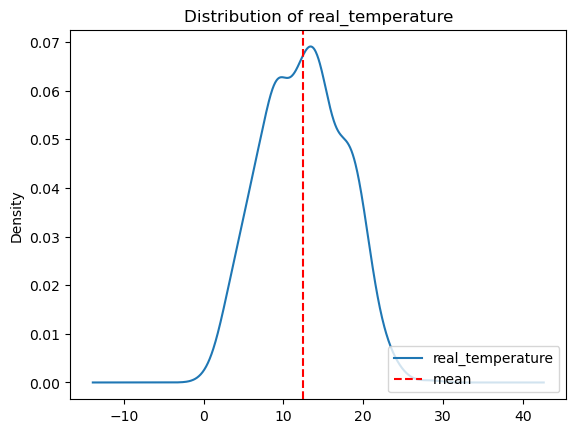

In [14]:
#Create a density plot to visualize distribution of real_temp
ax=bike_data['real_temperature'].plot.density(title="Distribution of real_temperature",label="real_temperature")

#Get the column mean
mean_real_temp=bike_data["real_temperature"].mean()

#Plot the column mean
plt.axvline (x=mean_real_temp,color="r",linestyle="--",label="mean")
ax.legend(loc="lower right");

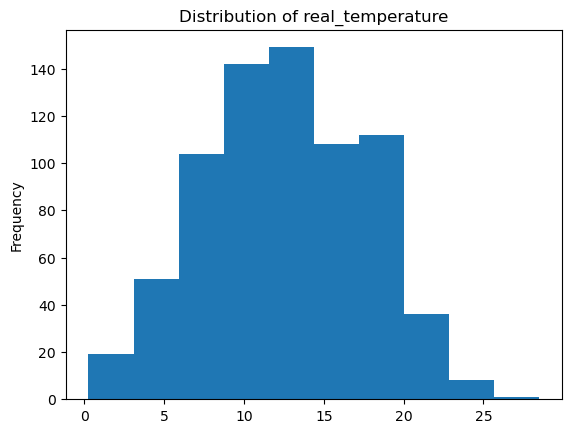

In [15]:
ax=bike_data['real_temperature'].plot.hist(title="Distribution of real_temperature",label="real_temperature")

## DATA STANDARDISATION

In [16]:
# Create a standard scaler object
std_scaler = StandardScaler()

# Standardise the real temperature column
bike_data['scaled_real_temp'] = std_scaler.fit_transform(X=bike_data[['real_temperature']])

In [17]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              730 non-null    object 
 1   real_temperature  730 non-null    float64
 2   feel_temperature  730 non-null    float64
 3   humidity          730 non-null    float64
 4   wind_speed        730 non-null    float64
 5   weather_code      730 non-null    object 
 6   is_holiday        730 non-null    bool   
 7   is_weekend        730 non-null    bool   
 8   season            730 non-null    object 
 9   count             730 non-null    int64  
 10  scaled_real_temp  730 non-null    float64
dtypes: bool(2), float64(5), int64(1), object(3)
memory usage: 52.9+ KB


In [18]:
bike_data[["real_temperature" , "scaled_real_temp"]]

,real_temperature,scaled_real_temp
0,2.75,-1.914593
1,9.00,-0.685001
2,8.00,-0.881736
3,9.00,-0.685001
4,9.00,-0.685001
...,...,...
725,4.00,-1.668675
726,7.50,-0.980103
727,7.00,-1.078470
728,3.25,-1.816226


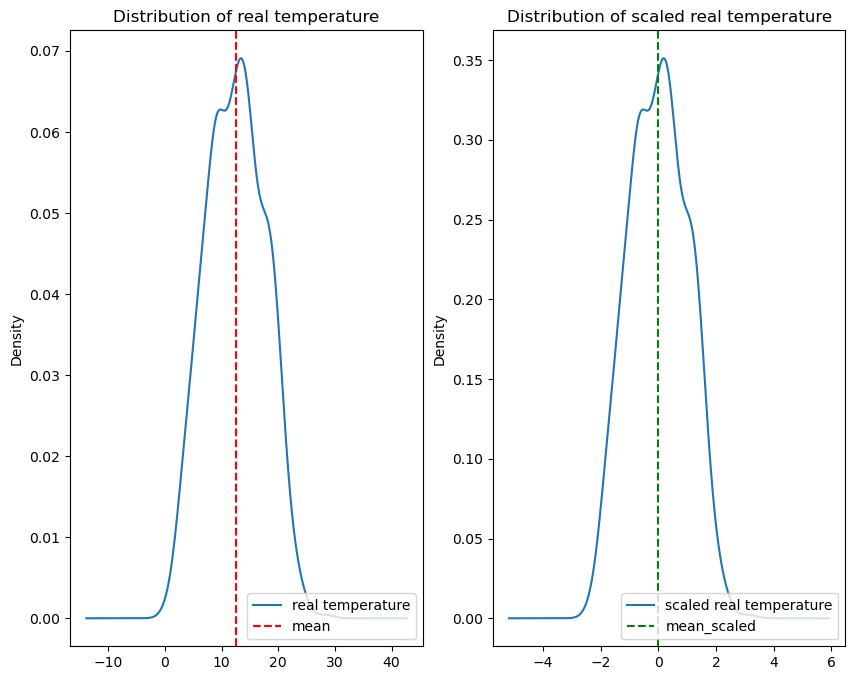

In [19]:
# Create a figure object for the distro plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,8))

# Create a density plot to visualise distribution of real_temp
bike_data['real_temperature'].plot.density(ax = ax1, title='Distribution of real temperature', label='real temperature')

# Get the column mean
mean_real_temp = bike_data['real_temperature'].mean()

# Plot the column mean
ax1.axvline(x=mean_real_temp, color='red', linestyle='dashed', label='mean')
ax1.legend(loc='lower right');

# Create a density plot to visualise distribution of scaled real_temp
bike_data['scaled_real_temp'].plot.density(ax=ax2, title='Distribution of scaled real temperature', label='scaled real temperature')

# Get the column mean
mean_scaled_real_temp = bike_data['scaled_real_temp'].mean()

# Plot the column mean
ax2.axvline(x=mean_scaled_real_temp, color='g', linestyle='--', label='mean_scaled')
ax2.legend(loc='lower right');


## Composite transformation using ColumnTransformer

In [20]:
bike_data.head()

,date,real_temperature,feel_temperature,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,count,scaled_real_temp
0,04/01/2015,2.75,0.00,93.00,7.500000,broken_clouds,False,True,winter,9234,-1.914593
1,05/01/2015,9.00,7.25,81.50,8.854167,broken_clouds,False,False,winter,20372,-0.685001
2,06/01/2015,8.00,5.75,79.75,16.000000,clear,False,False,winter,20613,-0.881736
3,07/01/2015,9.00,5.50,81.00,19.760870,scattered_clouds,False,False,winter,21064,-0.685001
4,08/01/2015,9.00,6.75,79.50,20.479167,rain,False,False,winter,15601,-0.685001


In [21]:
# Create a column transformer object
# column_transformer = make_column_transformer()
column_transform = make_column_transformer(
    (bike_data['real_temperature'], StandardScaler()),
    (bike_data['season'], OneHotEncoder())
)

column_transform

ColumnTransformer(transformers=[('series-1',
                                 0      2.75
1      9.00
2      8.00
3      9.00
4      9.00
       ... 
725    4.00
726    7.50
727    7.00
728    3.25
729    4.50
Name: real_temperature, Length: 730, dtype: float64,
                                 StandardScaler()),
                                ('series-2',
                                 0      winter
1      winter
2      winter
3      winter
4      winter
        ...  
725    winter
726    winter
727    winter
728    winter
729    winter
Name: season, Length: 730, dtype: object,
                                 OneHotEncoder())])